# Natural Language Processing & Text Mining
### MBD - O1
### Fake News Text Classification Assignment
#### Irune Maury
#### Juan Pablo García

The following document describes the detailed process for the contruction of a text classification model based in Natural Language Processing and Machine Learning techniques. The main objective is to classify different news into REAL or FAKE based in different structural analysis.  

# Importing Data

As a starting point we read the training and testing datasets, set the ID as the intex of each observation, and start analyzing the datasets' structure to get familiarized with the data.

In [1]:
import pandas as pd 

# Train 3999
df_train = pd.read_csv("fake_or_real_news_training.csv")

df_train = df_train.set_index("ID")

df_train.head()

,title,text,label,X1,X2
ID,,,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,NaN,NaN
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,NaN,NaN
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,NaN,NaN
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,NaN,NaN
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,NaN,NaN


In [2]:
df_train.shape

(3999, 5)

In [3]:
# Test
df_test = pd.read_csv("fake_or_real_news_test.csv")
df_test.head()

,ID,title,text
0,10498,September New Homes Sales Rise——-Back To 1992 ...,September New Homes Sales Rise Back To 1992 Le...
1,2439,Why The Obamacare Doomsday Cult Can't Admit It...,But when Congress debated and passed the Patie...
2,864,"Sanders, Cruz resist pressure after NY losses,...",The Bernie Sanders and Ted Cruz campaigns vowe...
3,4128,Surviving escaped prisoner likely fatigued and...,Police searching for the second of two escaped...
4,662,Clinton and Sanders neck and neck in Californi...,No matter who wins California's 475 delegates ...


In [4]:
df_test.shape

(2321, 3)

We can observe in the triaining dataset that two columns (X1 and X2) are the result of errors in the data structure. In these cases, part of the text of the news is separated and displayed in the label and X1 columns, and the label data displpayed in the X1 column for some cases, and X2 column for others.

To adjust these cases, we do the following process:
1. Identify from label column the cases with text different to "FAKE" or "REAL" and asign them to a new temporal dataset.
2. Merge the text column with the label column considering that the words must be separated by a space.
3. Replace the label column with the text from the X1 column
4. Drop the X1 column

These steps are also followed for the cases that show text from the news column in the label and X1 column.

In [5]:
import warnings
warnings.filterwarnings("ignore")
df_temp = df_train.loc[(df_train.label != 'FAKE') & (df_train.label != 'REAL')] 
df_temp.text = df_temp.text + ' ' + df_temp.label
df_temp.label = df_temp.X1
df_temp.drop('X1', axis=1, inplace=True)

In [6]:
df_temp2 = df_temp.loc[(df_temp.label != 'FAKE') & (df_temp.label != 'REAL')] 
df_temp2.text = df_temp2.text + ' ' + df_temp2.label
df_temp2.label = df_temp2.X2
df_temp2.drop('X2', axis=1, inplace=True)

df_temp = df_temp.drop([9,6268], axis=0)

Now that we fixed the text and label columns for the temporal dataset, we append it tho the original training dataset, drop the observations that presented errors, and make sure that the structure is similar to the original dataset regarding the number of observations. Our new resulting dataset is df_base which will be used for the training and testing of the classification models.

In [7]:
df_train2 = df_train.drop([599, 10194,   356,  2786,  3622,  7375,  9097,  
                           9203,  1602, 4562,  4748,  3508,  7559,  3634,
                           8470,  6404, 10499, 9,10492, 10138,  4953, 
                           496,  5741,  4131,  8748,  6717,  2943,5248,  
                           3624,  6268,  2738,  4025,  9954], axis=0)
df_train2.drop('X1', axis=1, inplace=True)
df_train2.drop('X2', axis=1, inplace=True)

In [8]:
df_train2
df_temp.drop('X2', axis=1, inplace=True)
df_temp
df_temp2

df_train2 = df_train2.append(df_temp)
df_base = df_train2.append(df_temp2)
df_base.head()

,title,text,label
ID,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [9]:
df_base.shape

(3999, 3)

After confirming that the dataset structure is correct, as an initial modeling step, we create a baseline model without doing any transformtions to the data. This initial model only considers the text column. 
This step will work as a benchmark to asses if the subsequent transformations help the classification accuracy.

### Text Variable

In [10]:
##TEXT
#Data Split
from sklearn.model_selection import train_test_split

# Set `y` 
y = df_base.label 

# Drop the `label` column
df_base.drop("label", axis=1)

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df_base['text'], y, test_size=0.20, random_state=53)

We first will evaluate the base model converting the collection of text documents to a matrix of token counts with the **CountVectorizer** methodology. This methodology considers basic preprocesing to the data such as lowercasing the words and ignoring punctuation.

In [11]:
#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english',lowercase=True)

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

We now train the model with the Multinomial Naive Bayes classifier considering the count vectoriser matrix.

We can see an initial accuracy score of 0.876.

accuracy:   0.876


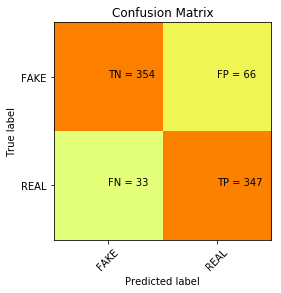

In [36]:
##BASELINE NB
# Machine Learning
# Training Naive Bayes (NB) classifier on training data and CountVectorizer.
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
clf = MultinomialNB()
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['FAKE','REAL']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

The CountVectoriser is a good starting point for creating the base model. However, this method is a simple count that considers the same weights for all the words. The **TF-IDF** methodology highlights words that are more interesting for the text classification (the words that are not so common). However, when we try this classifier methodology with the naive bayes algorithm, the accuracy score decreases due to the nature of this algorithm that works with discrete features.

In [13]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

accuracy:   0.782


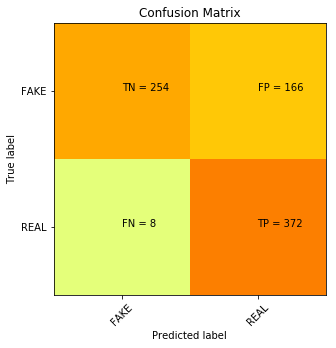

In [14]:
##BASELINE NB TF-IDF
# Machine Learning
# Training Naive Bayes (NB) classifier on training data and TF-IDF.
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
clf = MultinomialNB()
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plt.figure(figsize=(10,5))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['FAKE','REAL']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Now we will test a Support Vector Machine (SGDClassifier) Baseline with a Pieline that considers CountVectorizer, and TFIDF transformer. We can see that the score increases to 0.905 of accuracy.

accuracy:   0.905


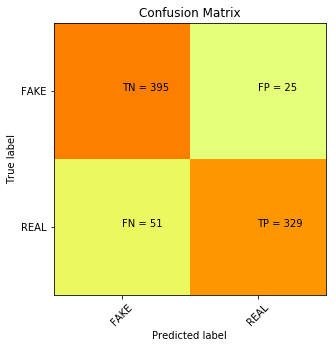

In [15]:
##BASELINE SVM
# Training Support Vector Machines - SVM and calculating its performance
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
predicted_svm = text_clf_svm.predict(X_test)
score = accuracy_score(y_test, predicted_svm)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, predicted_svm, labels=['FAKE', 'REAL'])
plt.figure(figsize=(10,5))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['FAKE','REAL']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Another binary classification algorithm is the passive agressive classifier. This algorithm iteratively updates the weigths of the model in a passive or agressive quantity depending on the magnitude of the error introduced in each iteration. It can make agressive updates or remain passive as a regularization way to avoid overfitting. We may see that the Passive Agressive algorithm gives an accuracy of 0.938 when introduced to the Pipeline.

accuracy:   0.934


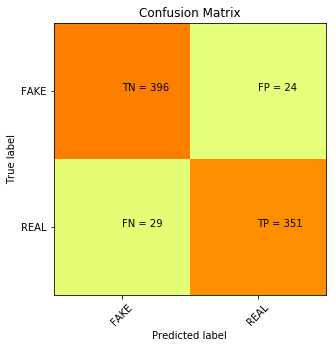

In [16]:
#PASSIVE AGRESSIVE CLASSIFIER 
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PassiveAggressiveClassifier
text_clf_pa = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('linear_clf', PassiveAggressiveClassifier(n_iter=50))])

text_clf_pa = text_clf_pa.fit(X_train, y_train)
predicted_pa = text_clf_pa.predict(X_test)
score = accuracy_score(y_test, predicted_pa)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, predicted_pa, labels=['FAKE', 'REAL'])
plt.figure(figsize=(10,5))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['FAKE','REAL']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

The last algorithm we test is the logistic regression. We can observe an accuracy score of 0.926

accuracy:   0.926


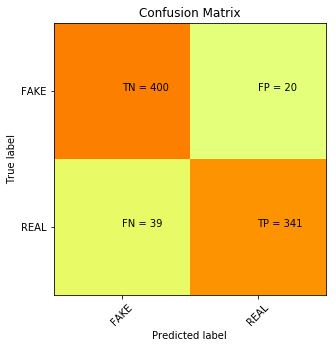

In [17]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),])
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
plt.figure(figsize=(10,5))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['FAKE','REAL']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Title Variable

accuracy:   0.744


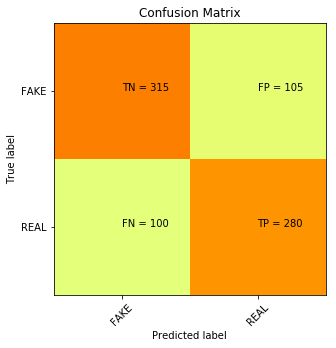

In [18]:
#TITLE
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Set `y` 
y = df_base.label 

# Drop the `label` column
df_base.drop("label", axis=1)

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df_base['title'], y, test_size=0.20, random_state=53)

#PASSIVE AGRESSIVE CLASSIFIER 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PassiveAggressiveClassifier
text_clf_pa = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('linear_clf', PassiveAggressiveClassifier(n_iter=50))])

text_clf_pa = text_clf_pa.fit(X_train, y_train)
predicted_pa = text_clf_pa.predict(X_test)
score = accuracy_score(y_test, predicted_pa)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, predicted_pa, labels=['FAKE', 'REAL'])
plt.figure(figsize=(10,5))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['FAKE','REAL']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Title and Text Variables Combined

accuracy:   0.939


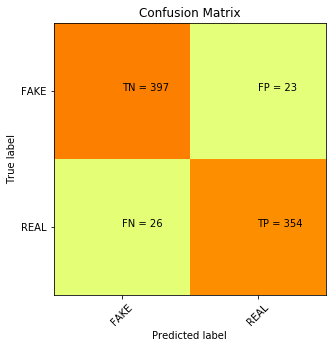

In [19]:
#TITLE + TEXT
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

df_base['title_text'] = df_base.title + ' ' + df_base.text

# Set `y` 
y = df_base.label 

# Drop the `label` column
df_base.drop("label", axis=1)

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df_base['title_text'], y, test_size=0.20, random_state=53)

#PASSIVE AGRESSIVE CLASSIFIER 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PassiveAggressiveClassifier
text_clf_pa = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('linear_clf', PassiveAggressiveClassifier(n_iter=50))])

text_clf_pa = text_clf_pa.fit(X_train, y_train)
predicted_pa = text_clf_pa.predict(X_test)
score = accuracy_score(y_test, predicted_pa)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, predicted_pa, labels=['FAKE', 'REAL'])
plt.figure(figsize=(10,5))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['FAKE','REAL']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## Data preprocessing

Now we will perform data proprocessing to remove noise and test if we can improve the baseline model results. We will  assigning POS tagging or removing special characters.

The first step for data preprocessing is word tokenization. In the following steps we briefly analyze the main differences in tokenization methodologies: Word_tokenize, WordPunct, Whitespace and MWE.

In [20]:
#Tokenization
from nltk.tokenize import word_tokenize, WordPunctTokenizer, WhitespaceTokenizer, MWETokenizer
wpt = WordPunctTokenizer()
wst = WhitespaceTokenizer()
mwet = MWETokenizer()

#import nltk
#import pandas as pd
df_base['word_token'] = df_base.apply(lambda row: word_tokenize(row['title_text']), axis=1)
df_base['wpt_tokens'] = df_base.apply(lambda row: wpt.tokenize(row['title_text']), axis=1)
df_base['wst_tokens'] = df_base.apply(lambda row: wst.tokenize(row['title_text']), axis=1)
df_base['MWET_tokens'] = df_base.apply(lambda row: mwet.tokenize(row['title_text'].split()), axis=1)
df_base.head()

,title,text,label,title_text,word_token,wpt_tokens,wst_tokens,MWET_tokens
ID,,,,,,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,"[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre..."
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,"[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit..."
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....,"[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy..."
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,"[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a..."
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...,"[The, Battle, of, New, York, :, Why, This, Pri...","[The, Battle, of, New, York, :, Why, This, Pri...","[The, Battle, of, New, York:, Why, This, Prima...","[The, Battle, of, New, York:, Why, This, Prima..."


In [21]:
#Evaluating each word tokenizer
print("Word Tokenize: %d words" % len(df_base.word_token[3608]))
print("Word Punct: %d words" % len(df_base.wpt_tokens[3608]))
print("White Space: %d words" % len(df_base.wst_tokens[3608]))
print("MWE: %d words" % len(df_base.MWET_tokens[3608]))

Word Tokenize: 493 words
Word Punct: 500 words
White Space: 440 words
MWE: 440 words


From the code cell above, we can see that the Word Punct tokenizer tends to separate tokens based in spaces and punctuation signs. However it isn't considering that some punctuations signs may refer to abreviations such as U.S.

Now we will proceed to extract the Stem and the Lemma from the tokens. 
* By **Stemming** we remove affixes (word endings) to work with the roots of the words.
* By **Lemmatizing** we obtain the lemma of a word, meaning the correct word roots. This methodology not only removes endings, but also replaces the words with its correct root based in the english dictionary.

In [22]:
#Stemming
from nltk.stem.snowball import SnowballStemmer
english_stemmer = SnowballStemmer('english', ignore_stopwords=True)

def stem_list_1(row):
    my_list = row['word_token']
    stemmed_list = [english_stemmer.stem(word) for word in my_list]
    return (stemmed_list)
df_base['word_token_stemm'] = df_base.apply(stem_list_1, axis=1)

def stem_list_2(row):
    my_list = row['wpt_tokens']
    stemmed_list = [english_stemmer.stem(word) for word in my_list]
    return (stemmed_list)
df_base['wpt_tokens_stemm'] = df_base.apply(stem_list_2, axis=1)

def stem_list_3(row):
    my_list = row['wst_tokens']
    stemmed_list = [english_stemmer.stem(word) for word in my_list]
    return (stemmed_list)
df_base['wst_tokens_stemm'] = df_base.apply(stem_list_3, axis=1)

def stem_list_4(row):
    my_list = row['MWET_tokens']
    stemmed_list = [english_stemmer.stem(word) for word in my_list]
    return (stemmed_list)
df_base['MWET_tokens_Stemm'] = df_base.apply(stem_list_4, axis=1)

In [23]:
#Lemmatizing
from nltk.stem import WordNetLemmatizer
wnlt = WordNetLemmatizer()

def lemm_list_1(row):
    my_list = row['word_token']
    lemm_list = [wnlt.lemmatize(word) for word in my_list]
    return (lemm_list)
df_base['word_token_lemma'] = df_base.apply(lemm_list_1, axis=1)

def lemm_list_2(row):
    my_list = row['wpt_tokens']
    lemm_list = [wnlt.lemmatize(word) for word in my_list]
    return (lemm_list)
df_base['wpt_tokens_lemma'] = df_base.apply(lemm_list_2, axis=1)

def lemm_list_3(row):
    my_list = row['wst_tokens']
    lemm_list = [wnlt.lemmatize(word) for word in my_list]
    return (lemm_list)
df_base['wst_tokens_lemma'] = df_base.apply(lemm_list_3, axis=1)

def lemm_list_4(row):
    my_list = row['MWET_tokens']
    lemm_list = [wnlt.lemmatize(word) for word in my_list]
    return (lemm_list)
df_base['MWET_tokens_lemma'] = df_base.apply(lemm_list_3, axis=1)

df_base.head()

,title,text,label,title_text,word_token,wpt_tokens,wst_tokens,MWET_tokens,word_token_stemm,wpt_tokens_stemm,wst_tokens_stemm,MWET_tokens_Stemm,word_token_lemma,wpt_tokens_lemma,wst_tokens_lemma,MWET_tokens_lemma
ID,,,,,,,,,,,,,,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,"[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[you, can, smell, hillari, ’, s, fear, daniel,...","[you, can, smell, hillari, ’, s, fear, daniel,...","[you, can, smell, hillari, fear, daniel, green...","[you, can, smell, hillari, fear, daniel, green...","[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre..."
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,"[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[watch, the, exact, moment, paul, ryan, commit...","[watch, the, exact, moment, paul, ryan, commit...","[watch, the, exact, moment, paul, ryan, commit...","[watch, the, exact, moment, paul, ryan, commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit..."
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....,"[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[kerri, to, go, to, pari, in, gestur, of, symp...","[kerri, to, go, to, pari, in, gestur, of, symp...","[kerri, to, go, to, pari, in, gestur, of, symp...","[kerri, to, go, to, pari, in, gestur, of, symp...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy..."
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,"[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[berni, support, on, twitter, erupt, in, anger...","[berni, support, on, twitter, erupt, in, anger...","[berni, support, on, twitter, erupt, in, anger...","[berni, support, on, twitter, erupt, in, anger...","[Bernie, supporter, on, Twitter, erupt, in, an...","[Bernie, supporter, on, Twitter, erupt, in, an...","[Bernie, supporter, on, Twitter, erupt, in, an...","[Bernie, supporter, on, Twitter, erupt, in, an..."
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...,"[The, Battle, of, New, York, :, Why, This, Pri...","[The, Battle, of, New, York, :, Why, This, Pri...","[The, Battle, of, New, York:, Why, This, Prima...","[The, Battle, of, New, York:, Why, This, Prima...","[the, battl, of, new, york, :, why, this, prim...","[the, battl, of, new, york, :, why, this, prim...","[the, battl, of, new, york:, why, this, primar...","[the, battl, of, new, york:, why, this, primar...","[The, Battle, of, New, York, :, Why, This, Pri...","[The, Battle, of, New, York

### Remove special characters
Now we will test if by removing special characters to the MWET lemmatized column, which showed the best accuracy untill now, we can improve the score.

In [24]:
#Removing special characters
df_base['text_no_chars'] = df_base.title_text.str.replace('[-()\"#/@;:<>{}`+=~|.!?,\n’“”%$—]', '')

mwet = MWETokenizer()
df_base['text_no_chars_MWET'] = df_base.apply(lambda row: mwet.tokenize(row['text_no_chars'].split()), axis=1)

def lemm_list_5(row):
    my_list = row['text_no_chars_MWET']
    lemm_list = [wnlt.lemmatize(word) for word in my_list]
    return (lemm_list)
df_base['text_no_chars_MWET_lemma'] = df_base.apply(lemm_list_5, axis=1)
df_base.head(5)

,title,text,label,title_text,word_token,wpt_tokens,wst_tokens,MWET_tokens,word_token_stemm,wpt_tokens_stemm,wst_tokens_stemm,MWET_tokens_Stemm,word_token_lemma,wpt_tokens_lemma,wst_tokens_lemma,MWET_tokens_lemma,text_no_chars,text_no_chars_MWET,text_no_chars_MWET_lemma
ID,,,,,,,,,,,,,,,,,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,"[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[you, can, smell, hillari, ’, s, fear, daniel,...","[you, can, smell, hillari, ’, s, fear, daniel,...","[you, can, smell, hillari, fear, daniel, green...","[you, can, smell, hillari, fear, daniel, green...","[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary, ’, s, Fear, Daniel,...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...","[You, Can, Smell, Hillary’s, Fear, Daniel, Gre...",You Can Smell Hillarys Fear Daniel Greenfield ...,"[You, Can, Smell, Hillarys, Fear, Daniel, Gree...","[You, Can, Smell, Hillarys, Fear, Daniel, Gree..."
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,"[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[watch, the, exact, moment, paul, ryan, commit...","[watch, the, exact, moment, paul, ryan, commit...","[watch, the, exact, moment, paul, ryan, commit...","[watch, the, exact, moment, paul, ryan, commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit...",Watch The Exact Moment Paul Ryan Committed Pol...,"[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Watch, The, Exact, Moment, Paul, Ryan, Commit..."
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....,"[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[kerri, to, go, to, pari, in, gestur, of, symp...","[kerri, to, go, to, pari, in, gestur, of, symp...","[kerri, to, go, to, pari, in, gestur, of, symp...","[kerri, to, go, to, pari, in, gestur, of, symp...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy...",Kerry to go to Paris in gesture of sympathy US...,"[Kerry, to, go, to, Paris, in, gesture, of, sy...","[Kerry, to, go, to, Paris, in, gesture, of, sy..."
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,"[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporters, on, Twitter, erupt, in, a...","[berni, support, on, twitter, erupt, in, anger...","[berni, support, on, twitter, erupt, in, anger...","[berni, support, on, twitter, erupt, in, anger...","[berni, support, on, twitter, erupt, in, anger...","[Bernie, supporter, on, Twitter, erupt, in, an...","[Bernie, supporter, on, Twitter, erupt, in, an...","[Bernie, supporter, on, Twitter, erupt, in, an...","[Bernie, supporter, on, Twitter, erupt, in, an...",Bernie supporters on Twitter erupt in anger ag...,"[Bernie, supporters, on, Twitter, erupt, in, a...","[Bernie, supporter, on, Twit

### POS - tagging
Now we will create bigrams and trigams, and test doing *Part of Speech Tagging* based in unigrams and bigrams. This will allow us to assign lexical-syntatic categories to the different words and help us improbe the lemma extraction and convesely expect a better acuracy score.

In [25]:
#POS-tagging (N-grams)
import nltk
from nltk import word_tokenize, pos_tag, pos_tag_sents
import pandas as pd

df_base['pos_tag_col'] = df_base['MWET_tokens'].apply(nltk.tag.pos_tag)

In [26]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams 

    
df_base['bigrams'] = df_base['MWET_tokens'].apply(lambda row: list(nltk.ngrams(row, 2)))
df_base['trigrams'] = df_base['MWET_tokens'].apply(lambda row: list(nltk.ngrams(row, 3)))

In [27]:
from nltk import DefaultTagger, UnigramTagger, BigramTagger
from nltk.corpus import brown
text = brown.tagged_sents(categories='news')[:500]
t0 = DefaultTagger('NN')
t1 = UnigramTagger(text, backoff=t0)
t2 = BigramTagger(text, backoff=t1)

#test_sent = df_base.MWET_tokens[9]
#t2.tag(test_sent)
df_base['pos_tag_bigram'] = df_base['MWET_tokens'].apply(lambda row: list(t2.tag(row)))

### Model testing

Now that we have performed multiple data preprocessing techniques, we will test with different models, which brings the best accuracy score. We will test for the different preprocessing transformations:
* SVM
* Passive Agressive Classifier
* Logistic Regression

In [28]:
def model_accuracy(y,X_train, X_test, y_train, y_test):
    from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    text_clf_svm_2 = Pipeline([('tfidf', TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,2),max_df= 0.85, min_df= 0.01)),
                             ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))])

    text_clf_svm_2 = text_clf_svm_2.fit(X_train.astype(str), y_train)
    predicted_svm_2 = text_clf_svm_2.predict(X_test.astype(str))
    score_2 = accuracy_score(y_test, predicted_svm_2)
    return score_2


In [29]:
#PIPELINE WITH SVM
import warnings
warnings.filterwarnings("ignore")
def check_pipeline(df_base, cols):
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    # Set `y` 
    y = df_base.label 

    # Drop the `label` column
    df_base.drop("label", axis=1)

    for col in cols:
        # Make training and test sets 
        X_train, X_test, y_train, y_test = train_test_split(df_base[col], y, test_size=0.20, random_state=53)
        accuracy = model_accuracy(y,X_train, X_test, y_train, y_test)
        print('Accuracy ({}): {:.4f} '.format(col,accuracy), end='\n')
        
cols = ['text','title_text','word_token', 'wpt_tokens', 'wst_tokens', 'MWET_tokens', 'word_token_stemm', 'wpt_tokens_stemm', 'wst_tokens_stemm', 'MWET_tokens_Stemm', 'word_token_lemma', 'wpt_tokens_lemma', 'wst_tokens_lemma', 'MWET_tokens_lemma', 'text_no_chars_MWET_lemma', 'pos_tag_col', 'pos_tag_bigram', 'bigrams', 'trigrams']
check_pipeline(df_base, cols)

Accuracy (text): 0.9000 
Accuracy (title_text): 0.8962 
Accuracy (word_token): 0.8962 
Accuracy (wpt_tokens): 0.8988 
Accuracy (wst_tokens): 0.9012 
Accuracy (MWET_tokens): 0.9012 
Accuracy (word_token_stemm): 0.9075 
Accuracy (wpt_tokens_stemm): 0.9075 
Accuracy (wst_tokens_stemm): 0.9025 
Accuracy (MWET_tokens_Stemm): 0.9025 
Accuracy (word_token_lemma): 0.9000 
Accuracy (wpt_tokens_lemma): 0.9038 
Accuracy (wst_tokens_lemma): 0.9012 
Accuracy (MWET_tokens_lemma): 0.9012 
Accuracy (text_no_chars_MWET_lemma): 0.9000 
Accuracy (pos_tag_col): 0.9100 
Accuracy (pos_tag_bigram): 0.9062 
Accuracy (bigrams): 0.8950 
Accuracy (trigrams): 0.8925 


In [30]:
def model_accuracy_pa(y,X_train, X_test, y_train, y_test):
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.linear_model import PassiveAggressiveClassifier
    text_clf_pa = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                             ('linear_clf', PassiveAggressiveClassifier(n_iter=50))])

    text_clf_pa = text_clf_pa.fit(X_train.astype(str), y_train)
    predicted_pa = text_clf_pa.predict(X_test.astype(str))
    score_pa = accuracy_score(y_test, predicted_pa)
    return score_pa

def model_accuracy_logit(y,X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    
    logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),])
    logreg = logreg.fit(X_train.astype(str), y_train)
    y_pred = logreg.predict(X_test.astype(str))
    score_logit = accuracy_score(y_test, y_pred)
    return score_logit

In [31]:
#PIPELINE WITH PASSIVE AGRESSIVE CLASSIFIER
import warnings
warnings.filterwarnings("ignore")
def check_pipeline(df_base, cols):
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    # Set `y` 
    y = df_base.label 

    # Drop the `label` column
    df_base.drop("label", axis=1)

    for col in cols:
        # Make training and test sets 
        X_train, X_test, y_train, y_test = train_test_split(df_base[col], y, test_size=0.20, random_state=53)
        accuracy = model_accuracy_pa(y,X_train, X_test, y_train, y_test)
        print('Accuracy ({}): {:.4f} '.format(col,accuracy), end='\n')
        
cols = ['text', 'title_text', 'word_token', 'wpt_tokens', 'wst_tokens', 'MWET_tokens', 'word_token_stemm', 'wpt_tokens_stemm', 'wst_tokens_stemm', 'MWET_tokens_Stemm', 'word_token_lemma', 'wpt_tokens_lemma', 'wst_tokens_lemma', 'MWET_tokens_lemma', 'text_no_chars_MWET_lemma', 'pos_tag_col', 'pos_tag_bigram', 'bigrams', 'trigrams']
check_pipeline(df_base, cols)

Accuracy (text): 0.9375 
Accuracy (title_text): 0.9425 
Accuracy (word_token): 0.9363 
Accuracy (wpt_tokens): 0.9450 
Accuracy (wst_tokens): 0.9413 
Accuracy (MWET_tokens): 0.9400 
Accuracy (word_token_stemm): 0.9350 
Accuracy (wpt_tokens_stemm): 0.9350 
Accuracy (wst_tokens_stemm): 0.9387 
Accuracy (MWET_tokens_Stemm): 0.9363 
Accuracy (word_token_lemma): 0.9413 
Accuracy (wpt_tokens_lemma): 0.9437 
Accuracy (wst_tokens_lemma): 0.9425 
Accuracy (MWET_tokens_lemma): 0.9375 
Accuracy (text_no_chars_MWET_lemma): 0.9325 
Accuracy (pos_tag_col): 0.9413 
Accuracy (pos_tag_bigram): 0.9363 
Accuracy (bigrams): 0.9463 
Accuracy (trigrams): 0.9413 


In [32]:
#PIPELINE WITH LOGISTIC REGRESSION
import warnings
warnings.filterwarnings("ignore")
def check_pipeline(df_base, cols):
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    # Set `y` 
    y = df_base.label 

    # Drop the `label` column
    df_base.drop("label", axis=1)

    for col in cols:
        # Make training and test sets 
        X_train, X_test, y_train, y_test = train_test_split(df_base[col], y, test_size=0.20, random_state=53)
        accuracy = model_accuracy_logit(y,X_train, X_test, y_train, y_test)
        print('Accuracy ({}): {:.4f} '.format(col,accuracy), end='\n')
        
cols = ['text', 'title_text', 'word_token', 'wpt_tokens', 'wst_tokens', 'MWET_tokens', 'word_token_stemm', 'wpt_tokens_stemm', 'wst_tokens_stemm', 'MWET_tokens_Stemm', 'word_token_lemma', 'wpt_tokens_lemma', 'wst_tokens_lemma', 'MWET_tokens_lemma', 'text_no_chars_MWET_lemma', 'pos_tag_col', 'pos_tag_bigram', 'bigrams', 'trigrams']
check_pipeline(df_base, cols)

Accuracy (text): 0.9263 
Accuracy (title_text): 0.9350 
Accuracy (word_token): 0.9375 
Accuracy (wpt_tokens): 0.9363 
Accuracy (wst_tokens): 0.9363 
Accuracy (MWET_tokens): 0.9363 
Accuracy (word_token_stemm): 0.9375 
Accuracy (wpt_tokens_stemm): 0.9375 
Accuracy (wst_tokens_stemm): 0.9387 
Accuracy (MWET_tokens_Stemm): 0.9387 
Accuracy (word_token_lemma): 0.9313 
Accuracy (wpt_tokens_lemma): 0.9387 
Accuracy (wst_tokens_lemma): 0.9363 
Accuracy (MWET_tokens_lemma): 0.9363 
Accuracy (text_no_chars_MWET_lemma): 0.9313 
Accuracy (pos_tag_col): 0.9400 
Accuracy (pos_tag_bigram): 0.9275 
Accuracy (bigrams): 0.9275 
Accuracy (trigrams): 0.9287 


From the above results, we can see that the **Passive-Agressive classifier** applied to the bigrams column gives us the best accuracy score of 0.9463. We will apply these techniques to predict new data.

In [39]:
df_test['title_text'] = df_test.title + ' ' + df_test.text
df_test['MWET_tokens'] = df_test.apply(lambda row: mwet.tokenize(row['title_text'].split()), axis=1)
df_test['bigrams'] = df_test['MWET_tokens'].apply(lambda row: list(nltk.ngrams(row, 2)))

In [40]:
# Exporting Predictions File
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PassiveAggressiveClassifier
import pandas as pd
# Set `y` 
y = df_base.label 

# Drop the `label` column
df_base.drop("label", axis=1)

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df_base['bigrams'], y, test_size=0.20, random_state=53)

text_clf_pa = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('linear_clf', PassiveAggressiveClassifier(n_iter=50))])

text_clf_pa = text_clf_pa.fit(X_train.astype(str), y_train.astype(str))
predicted_pa = text_clf_pa.predict(df_test.bigrams.astype(str))
        
import numpy as np
import pandas as pd
prediction = pd.DataFrame(predicted_pa, columns=['predictions'])
prediction = pd.concat([df_test.ID,prediction], axis=1, ignore_index=True)
prediction = prediction.rename(columns = {0:'ID', 1: 'Prediction'})
prediction.to_csv('prediction.csv', index=False)